ch14 모델 성능 향상시키기

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


In [2]:
df =pd.read_csv('./data/wine.csv', header=None)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [3]:
# 데이터를 학습데이터와 테스트 데이터로 분리

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, shuffle=True)

In [4]:
# MLP 모델 구성
model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12,  activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(1,  activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 모델 컴파일 및 학습
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

score = model.evaluate(X_test, y_test)
print('Test accuracy : ', score[1])
print('Train accuracy : ', history.history['accuracy'][-1])

Epoch 1/50
8/8 [==============================] - 2s 50ms/step - loss: 12.8309 - accuracy: 0.2456 - val_loss: 10.0828 - val_accuracy: 0.2485
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 8.1045 - accuracy: 0.2456 - val_loss: 6.2449 - val_accuracy: 0.2485
Epoch 3/50
8/8 [==============================] - 0s 15ms/step - loss: 5.0882 - accuracy: 0.2456 - val_loss: 3.8301 - val_accuracy: 0.2485
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 3.0601 - accuracy: 0.2456 - val_loss: 2.2640 - val_accuracy: 0.2485
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 1.7315 - accuracy: 0.2453 - val_loss: 1.1833 - val_accuracy: 0.2462
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 0.8975 - accuracy: 0.3156 - val_loss: 0.6216 - val_accuracy: 0.7092
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.5282 - accuracy: 0.8314 - val_loss: 0.4136 - val_accuracy: 0.8854
Epoch 8/50
8/8 [==============

In [6]:
# 모델 업데이트 하면서 모델 학습 실행
modelpath = './data/model2/{epoch:02d}-{val_accuracy:.4f}.hdf5'

# 학습중 모델 저장
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])

score = model.evaluate(X_test, y_test)
print('Test accuracy : ', score[1])
print('Train accuracy : ', history.history['accuracy'][-1])


Epoch 1: saving model to ./data/model2\01-0.9415.hdf5

Epoch 2: saving model to ./data/model2\02-0.9423.hdf5

Epoch 3: saving model to ./data/model2\03-0.9431.hdf5

Epoch 4: saving model to ./data/model2\04-0.9438.hdf5

Epoch 5: saving model to ./data/model2\05-0.9431.hdf5

Epoch 6: saving model to ./data/model2\06-0.9438.hdf5

Epoch 7: saving model to ./data/model2\07-0.9462.hdf5

Epoch 8: saving model to ./data/model2\08-0.9431.hdf5

Epoch 9: saving model to ./data/model2\09-0.9446.hdf5

Epoch 10: saving model to ./data/model2\10-0.9462.hdf5

Epoch 11: saving model to ./data/model2\11-0.9462.hdf5

Epoch 12: saving model to ./data/model2\12-0.9462.hdf5

Epoch 13: saving model to ./data/model2\13-0.9477.hdf5

Epoch 14: saving model to ./data/model2\14-0.9477.hdf5

Epoch 15: saving model to ./data/model2\15-0.9469.hdf5

Epoch 16: saving model to ./data/model2\16-0.9485.hdf5

Epoch 17: saving model to ./data/model2\17-0.9469.hdf5

Epoch 18: saving model to ./data/model2\18-0.9469.hdf5



In [7]:
# MLP 모델 구성
model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12,  activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

hist_df = pd.DataFrame(history.history)
# hist_df

Epoch 1/2000
8/8 [==============================] - 1s 36ms/step - loss: 5.2154 - accuracy: 0.2125 - val_loss: 1.4398 - val_accuracy: 0.2162
Epoch 2/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.8330 - accuracy: 0.5989 - val_loss: 0.6819 - val_accuracy: 0.7915
Epoch 3/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.6779 - accuracy: 0.8027 - val_loss: 0.6754 - val_accuracy: 0.8023
Epoch 4/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.6701 - accuracy: 0.8173 - val_loss: 0.6665 - val_accuracy: 0.8138
Epoch 5/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.6594 - accuracy: 0.8296 - val_loss: 0.6556 - val_accuracy: 0.8292
Epoch 6/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.6476 - accuracy: 0.8427 - val_loss: 0.6420 - val_accuracy: 0.8469
Epoch 7/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.6327 - accuracy: 0.8599 - val_loss: 0.6271 - val_accuracy: 0.8662
Epoch 8/2000
8/8 [=

KeyboardInterrupt: 

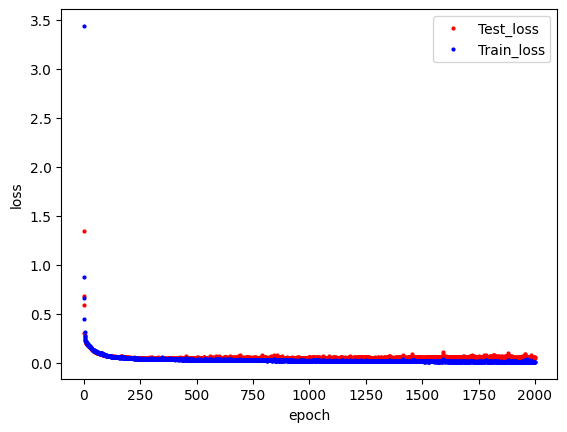

In [ ]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'ro', markersize=2, label='Test_loss')
plt.plot(x_len, y_loss, 'bo', markersize=2, label='Train_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [ ]:
# 중단 함수를 이용해서 최상의 모델을 찾음

stoping = EarlyStopping(monitor='val_loss', patience=20)

# 모델저장
modelpath = './data/model2/{epoch:02d}-{val_accuracy:.4f}.hdf5'

# 학습중 모델 저장
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=0, monitor='val_loss', save_best_only=True)

history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[stoping, checkpointer])


Epoch 1/2000
8/8 [==============================] - 0s 39ms/step - loss: 0.0121 - accuracy: 0.9959 - val_loss: 0.0567 - val_accuracy: 0.9885
Epoch 2/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0120 - accuracy: 0.9964 - val_loss: 0.0557 - val_accuracy: 0.9877
Epoch 3/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0123 - accuracy: 0.9964 - val_loss: 0.0570 - val_accuracy: 0.9869
Epoch 4/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.0579 - val_accuracy: 0.9869
Epoch 5/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0118 - accuracy: 0.9967 - val_loss: 0.0558 - val_accuracy: 0.9877
Epoch 6/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0122 - accuracy: 0.9969 - val_loss: 0.0607 - val_accuracy: 0.9862
Epoch 7/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0151 - accuracy: 0.9949 - val_loss: 0.0572 - val_accuracy: 0.9885
Epoch 8/2000
8/